# Trabajo Práctico 2: Reseñas de Películas - Análisis Exploratorio

## Grupo 11 - "Los Outliers"

- Castillo, Carlos
- Destefanis, Juan Pablo
- Gómez, Celeste

# Setup

In [ ]:
!pip install lingua-language-detector stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=6d4ab3fdf701cd6bd342114a3d046c76740e87439f3147ed1aa5f5faf37c92b9
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
nltk.download("punkt")

In [ ]:
sns.set_theme()
sns.set_palette("colorblind")

In [2]:
df = pd.read_csv("../datasets/train.zip", index_col="ID")
df.head()

,review_es,sentimiento
ID,,
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


In [ ]:
len(df)

50000

# Análisis Exploratorio

## Cantidad de Caracteres

Para analizar el texto podemos iniciar por ver qué longitudes tienen las críticas (contando la cantidad de caracteres por ejemplo), por lo que nos ayudamos de un histograma para ver cómo se distribuyen estas longitudes.

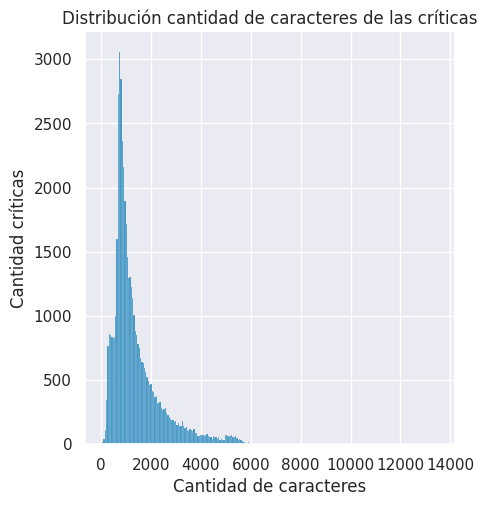

In [ ]:
longs = df["review_es"].str.len()
sns.displot(data=longs, kind="hist").set(title="Distribución cantidad de caracteres de las críticas")
plt.xlabel("Cantidad de caracteres")
plt.ylabel("Cantidad críticas")
plt.show()

In [ ]:
longs.describe()

count    50000.000000
mean      1398.058240
std       1037.688582
min         39.000000
25%        747.000000
50%       1037.000000
75%       1711.000000
max      13465.000000
Name: review_es, dtype: float64

Notamos que esta distribución pareciera ser "tail-heavy", lo que podría indicar la presencia de outliers.

Utilizamos un boxplot para visualizar más facilmente la distribución de los outliers de los textos en base a su cantidad de caracteres.

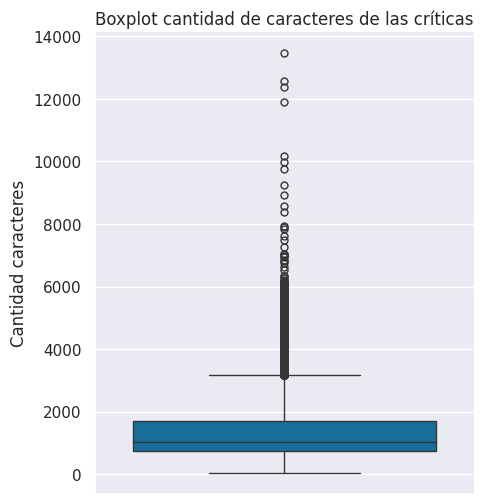

In [ ]:
sns.catplot(data=longs, kind="box", whis=1.5).set(title="Boxplot cantidad de caracteres de las críticas")
plt.ylabel("Cantidad caracteres")
plt.show()

Podemos inspeccionar algunas de las críticas que se encuentran en los extremos superiores en cuanto a sus cantidades de caracteres, por ejemplo, al ver el boxplot anterior se nos ocurre echar un vistazo a las que tienen más de 8000 caracteres, rango en donde la densidad de críticas parace disminuir signficativamente.

In [ ]:
df[df["review_es"].str.len() > 8000]

,review_es,sentimiento
ID,,
3024,If anyone ever assembles a compendium on moder...,positivo
3654,"*!!- SPOILERS - !!*Before I begin this, let me...",positivo
5708,"**Attention Spoilers**First of all, let me say...",positivo
12647,Titanic directed by James Cameron presents a f...,positivo
26582,Some have praised -Atlantis:-The Lost Empire- ...,negativo
31240,"(Some spoilers included:)Although, many commen...",positivo
31436,"Back in the mid/late 80s, an OAV anime by titl...",positivo
31481,Match 1: Tag Team Table Match Bubba Ray and Sp...,positivo
40521,There's a sign on The Lost Highway that says:*...,positivo


## Múltiples Idiomas

Viendo estas críticas notamos que todas ella están en inglés, lo que significa que el dataset, que consiste en críticas de películas en español, también contiene críticas en otros idiomas. Podemos analizar un poco más a detalle esta observación y ver qué idiomas existen en el dataset.

In [ ]:
from lingua import LanguageDetectorBuilder

detector = LanguageDetectorBuilder.from_all_languages().build()
langs = df["review_es"].apply(lambda x: detector.detect_language_of(x).iso_code_639_1.name)

Observamos los valores de idiomas detectados. Si bien esta librería no cuenta con una precisión del 100%, sus resultados nos sirven para hacernos una idea general del problema.

In [ ]:
langs.value_counts()

review_es
ES    48179
EN     1817
TL        3
PT        1
Name: count, dtype: int64

Podemos observar que la mayor parte de las críticas están en español y otro pequeño porcentaje en inglés. También hay otros dos idiomas, Tagalog, y Portugues, pero la cantidad de muestras de críticas en estos idiomas es significativamente baja, por lo que pueden deberse a situaciones en las que la librería no pudo determinar con confianza el lenguaje del texto. De hecho, examinando estas críticas nos damos cuenta que realmente están en español (salvo uno que incorpora palabras y nombres portugueses).

In [ ]:
pd.set_option("max_colwidth", 500)
df.loc[langs[(langs == "TL") | (langs == "PT")].index]

,review_es,sentimiento
ID,,
5159,"Junto con Fernando Fragata, João Mário Grilo, Abi Feijó, Leonel Vieira, Étc ... (Otros directores comerciales), Diamantino Costa es uno de los mejores directores portugueses;""O Lampião da Estrela"" fue su primera película (Diamantino Costa), antes de realizar varios anuncios exitosos.Este título es protagonizado por uno de los mejores comedios portugueses de todas las horas, Herman José y José Pedro Gomes son excelentes.Es una película muy divertida !!(28/07/2000) Boa Clase Diamantino ...",positivo
22814,Esta película fue tan buena.Leon Phelps es hilarante.Salí después y compré un caso de coñac !!!!!Salí después y compré un caso de coñac !!!!! Salí después y compré un caso de coñac !!!!! Salí después y compré un caso de coñac !!!!! Salí después y¡Compré un caso de coñac !!!!! ¡Salí después y compré un caso de coñac !!!!! Salí después y compré un caso de coñac !!!!! Salí después y compré un caso de coñac.!!!!! ¡Salí después y compré un caso de coñac !!!!! Salí tras y compré un caso de coñac !...,positivo
33906,"Hartley en forma de bajo perfil: Martin Donovan, nacido para jugar a Jesús, viene como Mesías a Millenial Manhatten;P.J. Harvey es excelente como Sidekick Magdelena.Una ligera película, pero drily divertida, corta y dulce.",positivo
47450,"Película excelente: Si aún no lo observaste, debes mirar.Geena Davis y Samuel L. Jackson son increíbles en esta película. Freat Actors + Good Story + increíbles escenas de acción> ""The Long Kiss Goingnight"", le doy un 10, A +, 4 estrellas.",positivo


Para visualizar más facilmente la distribución de los idiomas podemos utilizar un pie chart.

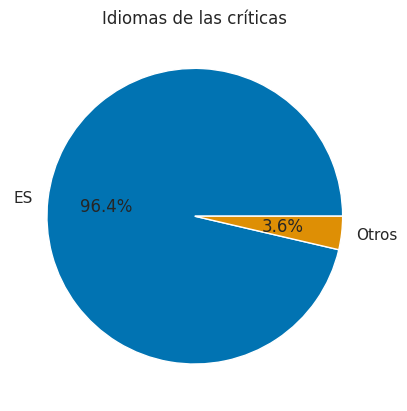

In [ ]:
langs_stats = langs.value_counts()

labels = [langs_stats.idxmax(), "Otros"]
max_freq = langs_stats.max()
sizes = [max_freq, len(langs) - max_freq]

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title(label="Idiomas de las críticas")
plt.show()

A pesar de que idealmente el dataset debería contener solamente críticas en español, por lo que las críticas en otros idiomas serían consideradas outliers, decidimos no optar por hacer esta distinción por ahora. Al momento de entrenar los modelos se valorará si los resultados mejoran o empeoran entrenando solamente con críticas en español, o si incluir otros idiomas mejora el rendimiento del algoritmo ante eventuales críticas en idiomas que desconoce.

## Cantidad de Palabras

Así a como analizamos la longitud de las críticas en base a la cantidad de caracteres, podemos analizarla en cuanto a la cantidad de palabras. En este caso optamos por simplemente separar las palabras por por los caracteres en blanco (comportamiento por defecto del método `split` en Python).

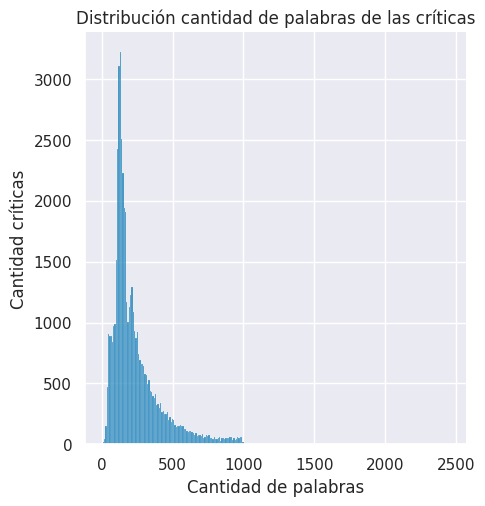

In [ ]:
words = df["review_es"].apply(lambda x: len(x.split()))
sns.displot(data=words, kind="hist").set(title="Distribución cantidad de palabras de las críticas")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Cantidad críticas")
plt.show()

Como era de esperarse, observamos una distribución bastante similar a la de la cantidad de caracteres.

## Sentimientos

Movemos nuestra atención hacia las diferentes categorías en las que podemos clasificar a una crítica. En este caso solo tenemos dos: positivo o negativo, con igual cantidad de muestras para ambos grupos.

In [ ]:
df["sentimiento"].value_counts()

sentimiento
positivo    25000
negativo    25000
Name: count, dtype: int64

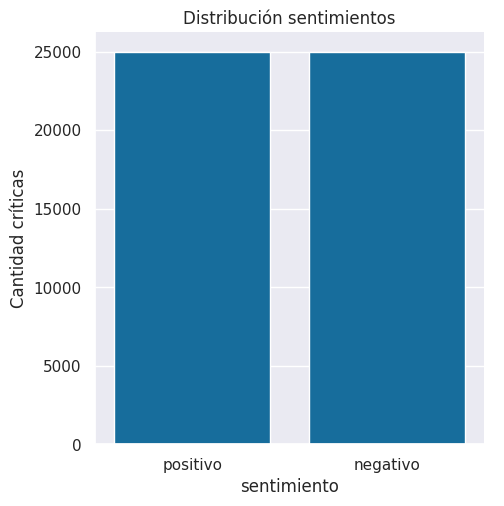

In [ ]:
sns.catplot(data=df, x="sentimiento", kind="count").set(title="Distribución sentimientos")
plt.ylabel("Cantidad críticas")
plt.show()

Entre ambos grupos se abarca la totalidad del conjunto de datos, por lo que no tenemos valores faltantes para el campo `sentimiento`. Verificamos que sucede lo mismo para el campo del texto de la crítica.

In [ ]:
len(df[df["review_es"].isna()]) == 0

True